In [82]:
pip install streamlit

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.0 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [5]:
import pandas as pd
import webbrowser
import os
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

-------------------------
Load Dataset
-------------------------

In [6]:
df = pd.read_csv("student_depression.csv")
print("Basic Dataset Information:")
df.info()


Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         2790

-----------------
Plot Numerical Analysis
----------------

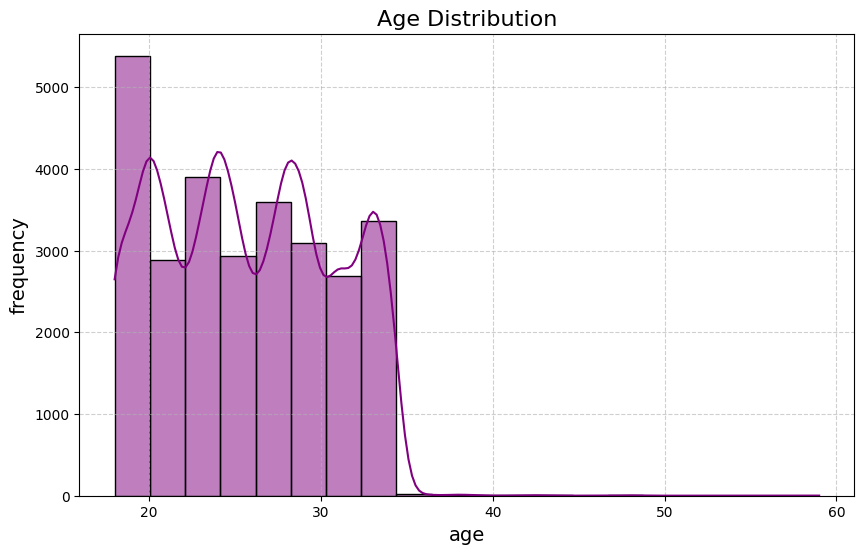

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color="purple", bins=20)

plt.title("Age Distribution", fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

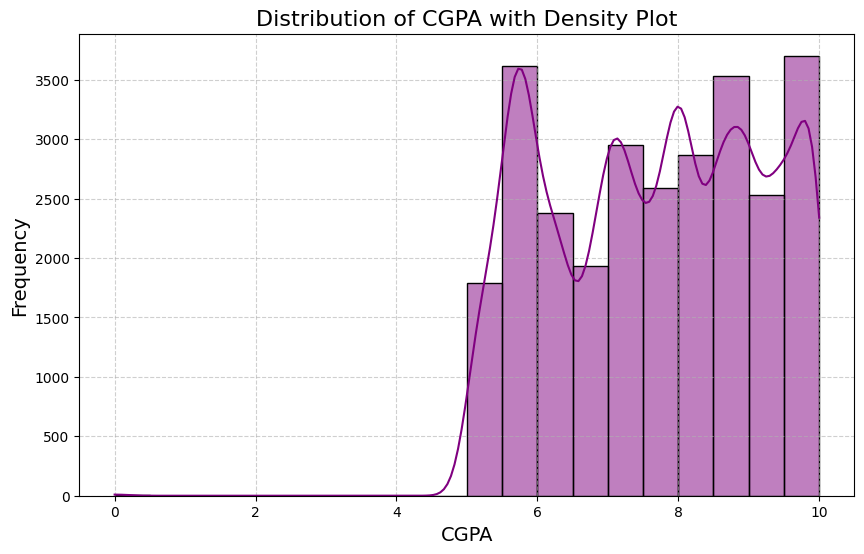

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True, color='purple', bins=20)

plt.title('Distribution of CGPA with Density Plot', fontsize=16)
plt.xlabel('CGPA', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

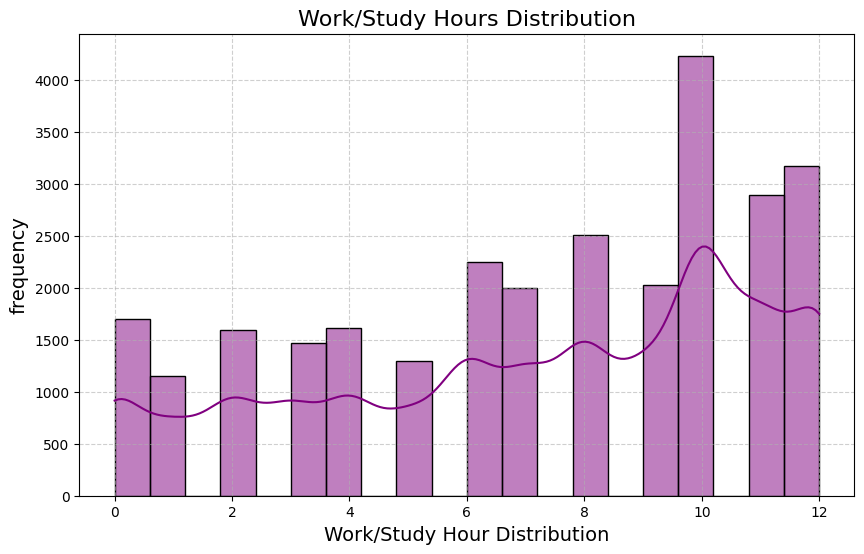

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Work/Study Hours'], kde=True, color="purple", bins=20)

plt.title("Work/Study Hours Distribution", fontsize=16)
plt.xlabel('Work/Study Hour Distribution', fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

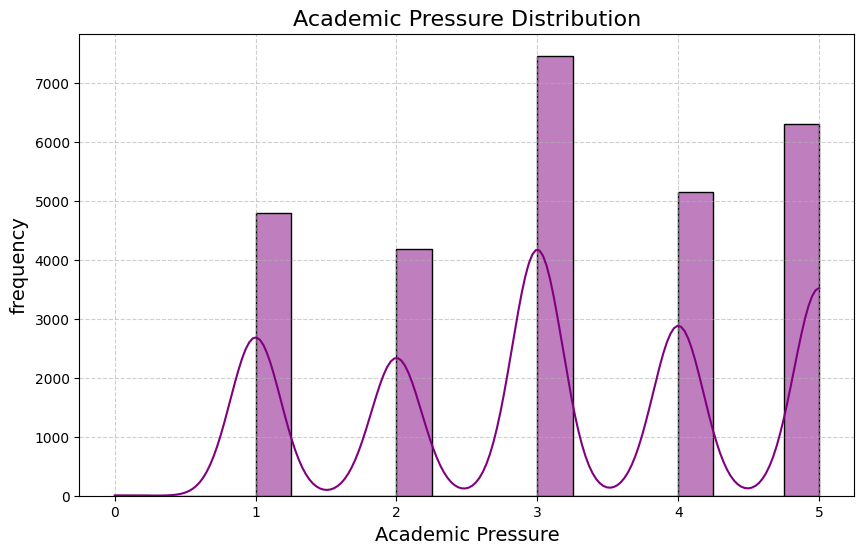

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Academic Pressure'], kde=True, color="purple", bins=20)

plt.title("Academic Pressure Distribution", fontsize=16)
plt.xlabel('Academic Pressure', fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

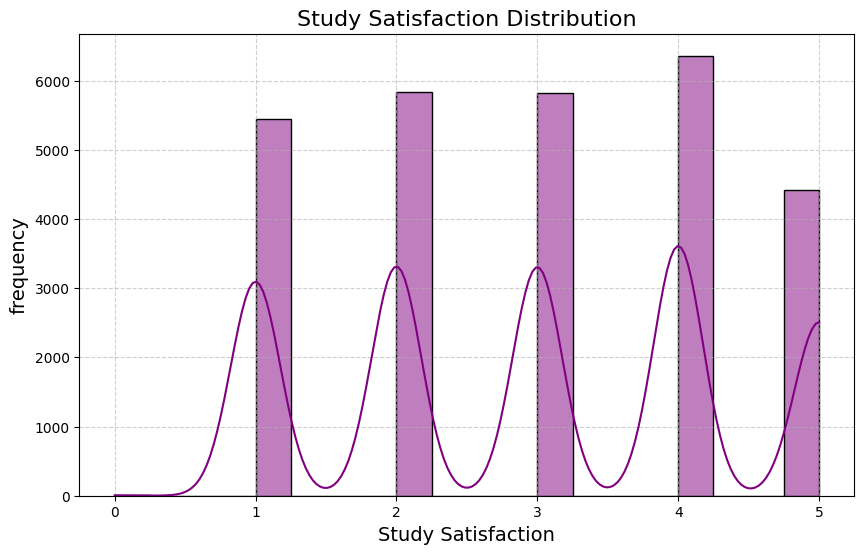

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Study Satisfaction'], kde=True, color="purple", bins=20)

plt.title("Study Satisfaction Distribution", fontsize=16)
plt.xlabel('Study Satisfaction', fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

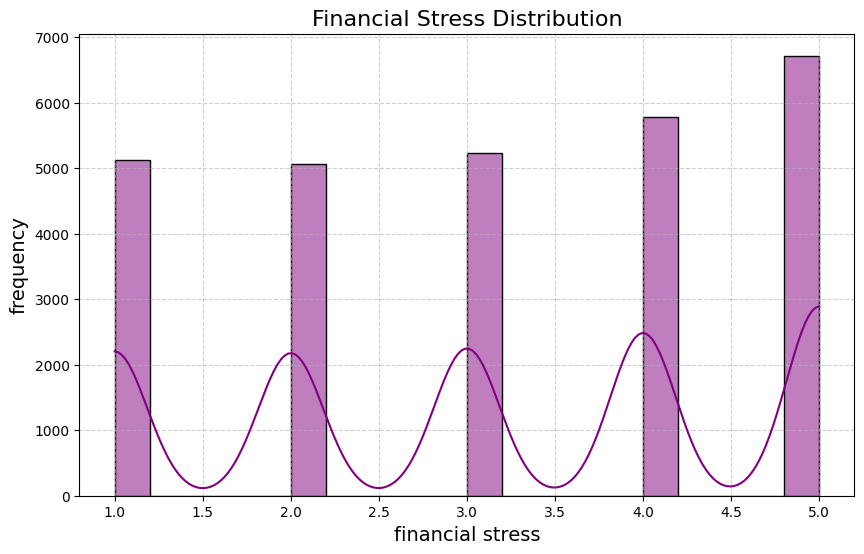

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Financial Stress'], kde=True, color="purple", bins=20)

plt.title("Financial Stress Distribution", fontsize=16)
plt.xlabel('financial stress', fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

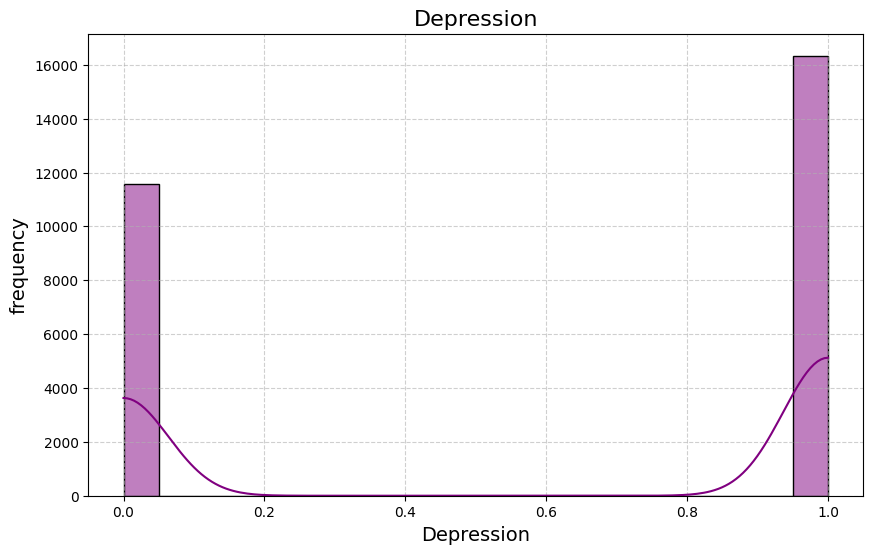

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Depression'], kde=True, color="purple", bins=20)

plt.title("Depression", fontsize=16)
plt.xlabel('Depression', fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

------------------
Plot Categorical Analysis
------------------

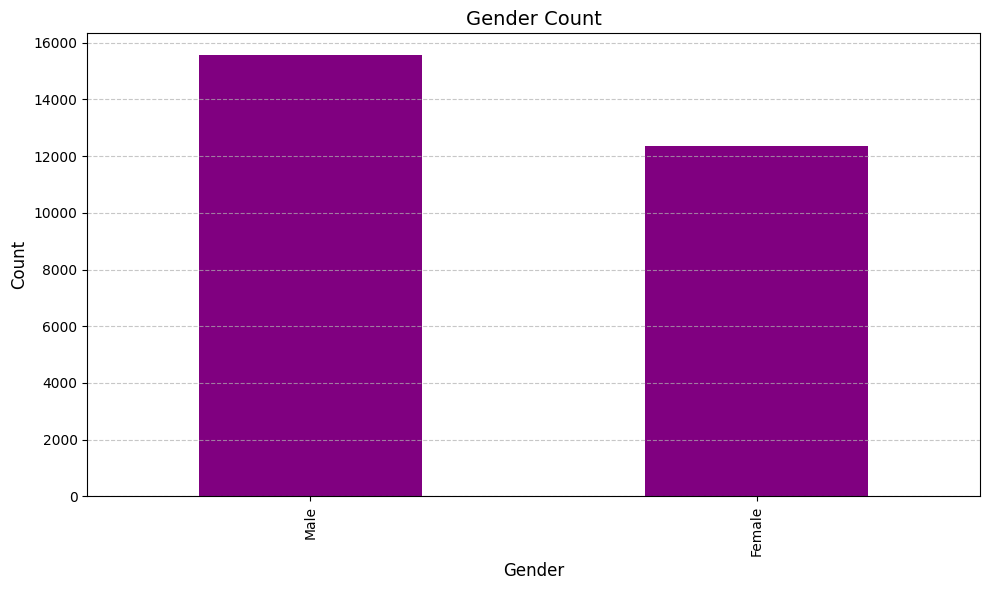

In [14]:
import matplotlib.pyplot as plt

profession_counts = df['Gender'].value_counts()

plt.figure(figsize=(10,6))
profession_counts.plot(kind='bar', color='purple')

plt.title('Gender Count', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

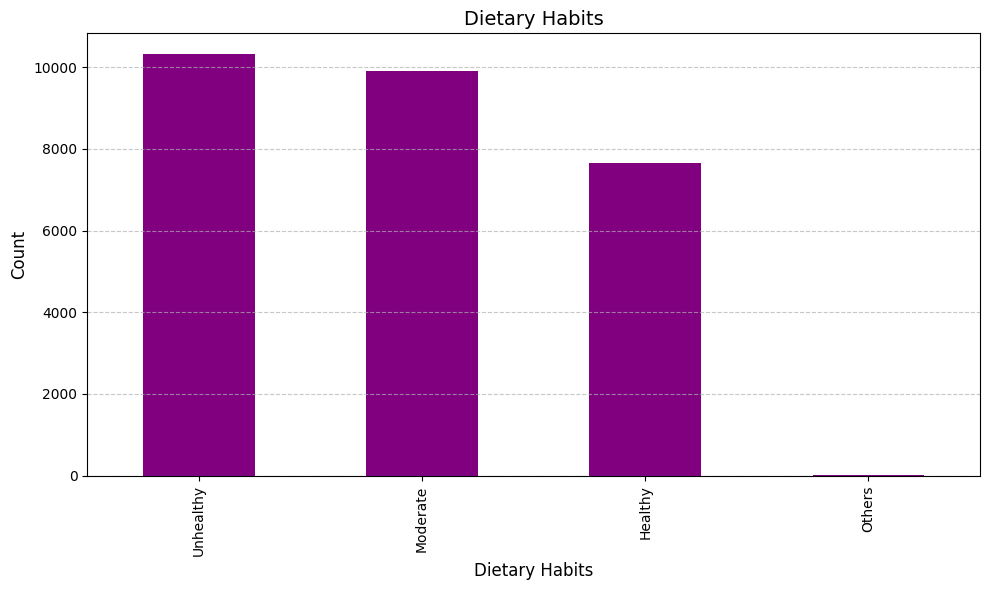

In [15]:
import matplotlib.pyplot as plt

profession_counts = df['Dietary Habits'].value_counts()

plt.figure(figsize=(10,6))
profession_counts.plot(kind='bar', color='purple')

plt.title('Dietary Habits', fontsize=14)
plt.xlabel('Dietary Habits', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

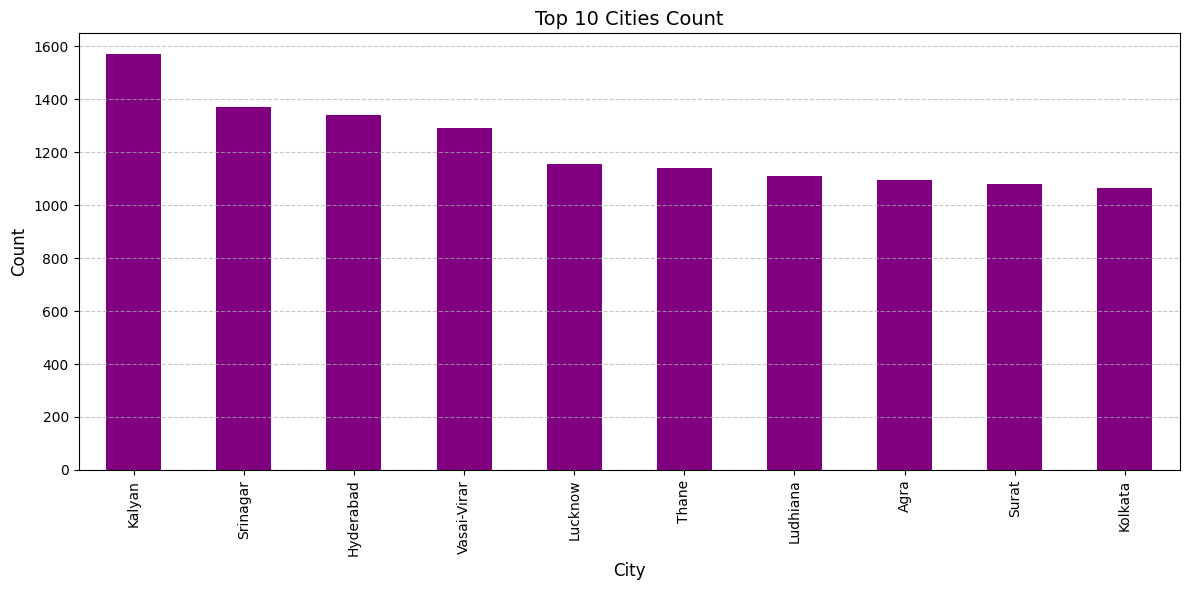

In [16]:
import matplotlib.pyplot as plt

# Get value counts of the 'City' column
city_counts = df['City'].value_counts()

top_n_cities = city_counts.head(10)

plt.figure(figsize=(12,6))
top_n_cities.plot(kind='bar', color='purple')

plt.title('Top 10 Cities Count', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

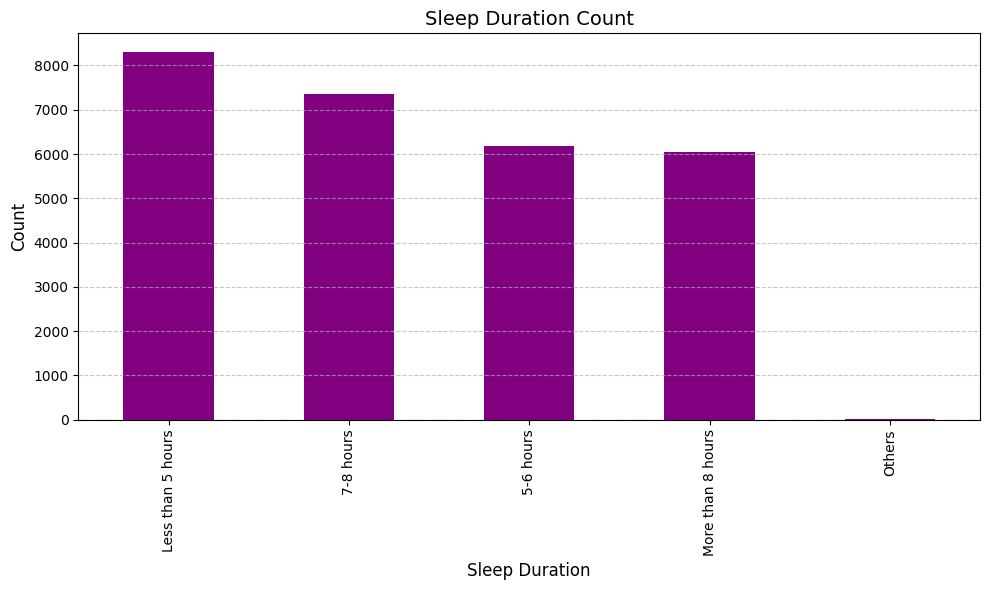

In [17]:
import matplotlib.pyplot as plt

profession_counts = df['Sleep Duration'].value_counts()

plt.figure(figsize=(10,6))
profession_counts.plot(kind='bar', color='purple')

plt.title('Sleep Duration Count', fontsize=14)
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

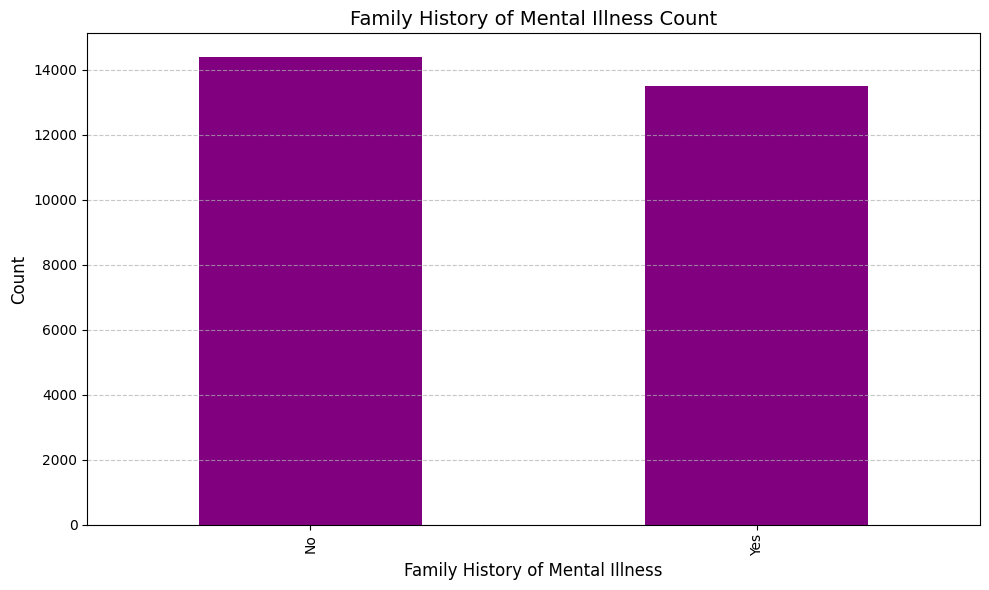

In [18]:
import matplotlib.pyplot as plt

profession_counts = df['Family History of Mental Illness'].value_counts()

plt.figure(figsize=(10,6))
profession_counts.plot(kind='bar', color='purple')

plt.title('Family History of Mental Illness Count', fontsize=14)
plt.xlabel('Family History of Mental Illness', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

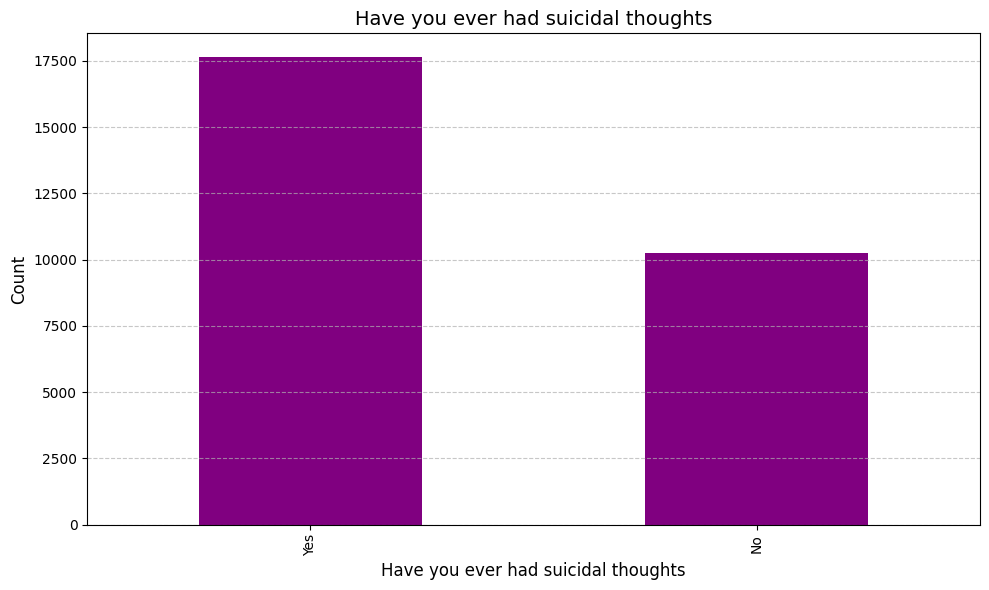

In [19]:
import matplotlib.pyplot as plt

profession_counts = df['Have you ever had suicidal thoughts ?'].value_counts()

plt.figure(figsize=(10,6))
profession_counts.plot(kind='bar', color='purple')

plt.title('Have you ever had suicidal thoughts', fontsize=14)
plt.xlabel('Have you ever had suicidal thoughts', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

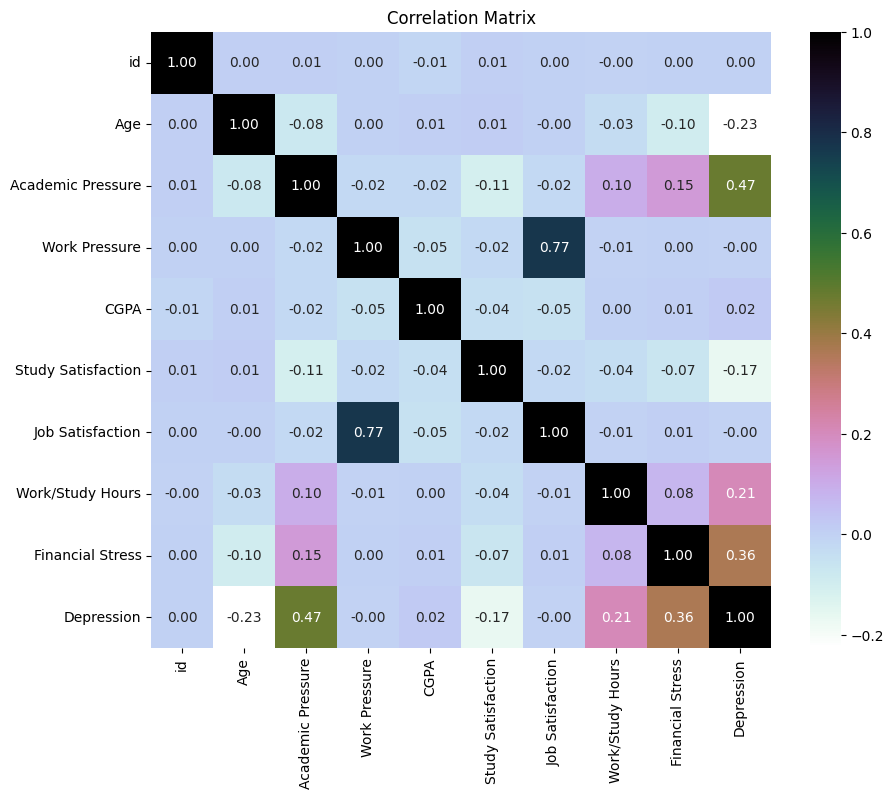

In [20]:
numerical_data = df.select_dtypes(include=['float64', 'int64']) 
correlation_matrix = numerical_data.corr() 

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

-----------------------------
Othr basic info of dataset
----------------------------

In [21]:
print('first 5 rows:')
df.head()

first 5 rows:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [22]:
df = df.drop(['id'], axis=1)

In [23]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [24]:
print(df['City'].value_counts())

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [25]:
cities_to_remove = df['City'].value_counts()[df['City'].value_counts() < 400]
main = df[~df['City'].isin(cities_to_remove.index)]
main['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [26]:
north_india = ['Srinagar', 'Lucknow', 'Delhi', 'Ghaziabad', 'Faridabad', 'Jaipur', 'Patna', 'Meerut', 'Kanpur', 'Agra']
south_india = ['Hyderabad', 'Chennai', 'Visakhapatnam', 'Bangalore', 'Pune']
west_india = ['Vasai-Virar', 'Thane', 'Mumbai', 'Ahmedabad', 'Surat', 'Rajkot', 'Vadodara', 'Nashik']
east_india = ['Kolkata', 'Varanasi']
central_india = ['Bhopal', 'Indore', 'Nagpur']

df.loc[df['City'].isin(north_india), 'City_Region'] = 'North India'
df.loc[df['City'].isin(south_india), 'City_Region'] = 'South India'
df.loc[df['City'].isin(west_india), 'City_Region'] = 'West India'
df.loc[df['City'].isin(east_india), 'City_Region'] = 'East India'
df.loc[df['City'].isin(central_india), 'City_Region'] = 'Central India'

df['City_Region'].value_counts()

City_Region
North India      9072
West India       7214
South India      4929
Central India    2228
East India       1751
Name: count, dtype: int64

In [27]:
kdf = df.drop(['City'], axis=1)
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,South India
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,South India
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,North India
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India


In [28]:
print('numerical columns:')
df.describe()

numerical columns:


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [29]:
print('unique value counts:')
print("\n\n", df.nunique())

unique value counts:


 Gender                                     2
Age                                       34
City                                      52
Profession                                14
Academic Pressure                          6
Work Pressure                              3
CGPA                                     332
Study Satisfaction                         6
Job Satisfaction                           5
Sleep Duration                             5
Dietary Habits                             4
Degree                                    28
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
City_Region                                5
dtype: int64


In [30]:
df['Profession'].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [31]:
df = df.drop(["Profession"], axis=1)

In [32]:
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,South India
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,South India
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,North India
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India


In [33]:
main["Work Pressure"].value_counts()

Work Pressure
0.0    27872
5.0        2
2.0        1
Name: count, dtype: int64

In [34]:
df = df.drop(['Work Pressure'], axis=1)

In [35]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,South India
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,South India
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,North India
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India


In [36]:
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6359
2.0    5838
3.0    5821
1.0    5451
5.0    4422
0.0      10
Name: count, dtype: int64

In [37]:
df = df.loc[df['Study Satisfaction'] > 0]
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6359
2.0    5838
3.0    5821
1.0    5451
5.0    4422
Name: count, dtype: int64

In [38]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,South India
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,South India
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,North India
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India


In [39]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27889
3.0        1
2.0        1
Name: count, dtype: int64

In [40]:
df = df.drop(['Job Satisfaction'], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,South India
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,South India
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,North India
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India


In [41]:
df['Age'].value_counts()

Age
24.0    2257
20.0    2235
28.0    2133
29.0    1950
33.0    1893
25.0    1784
21.0    1725
23.0    1645
18.0    1584
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1261
22.0    1160
26.0    1155
30.0    1144
35.0      10
38.0       7
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
51.0       1
44.0       1
49.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [42]:
df = df.loc[df['Age'] <= 30]
df['Age'].value_counts()

Age
24.0    2257
20.0    2235
28.0    2133
29.0    1950
25.0    1784
21.0    1725
23.0    1645
18.0    1584
19.0    1560
27.0    1462
22.0    1160
26.0    1155
30.0    1144
Name: count, dtype: int64

In [43]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,South India
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India
5,Male,29.0,Pune,2.0,5.70,3.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0,South India
6,Male,30.0,Thane,3.0,9.54,4.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0,West India


In [44]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6526
7-8 hours            5747
5-6 hours            4797
More than 8 hours    4712
Others                 12
Name: count, dtype: int64

In [45]:
df = df.loc[df['Sleep Duration'] != 'Others']
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6526
7-8 hours            5747
5-6 hours            4797
More than 8 hours    4712
Name: count, dtype: int64

In [46]:
df.loc[df['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
df.loc[df['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
df.loc[df['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
df.loc[df['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
df['Sleep Duration'].value_counts()

Sleep Duration
0    6526
2    5747
1    4797
3    4712
Name: count, dtype: int64

In [47]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,Moderate,BSc,No,3.0,2.0,Yes,0,South India
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India
5,Male,29.0,Pune,2.0,5.70,3.0,0,Healthy,PhD,No,4.0,1.0,No,0,South India
6,Male,30.0,Thane,3.0,9.54,4.0,2,Healthy,BSc,No,1.0,2.0,No,0,West India


In [48]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8372
Moderate     7602
Healthy      5799
Others          9
Name: count, dtype: int64

In [49]:
df = df.loc[df['Dietary Habits'] != 'Others']
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8372
Moderate     7602
Healthy      5799
Name: count, dtype: int64

In [50]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,Moderate,BSc,No,3.0,2.0,Yes,0,South India
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,Moderate,BCA,Yes,4.0,5.0,Yes,1,East India
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,Moderate,M.Tech,Yes,1.0,1.0,No,0,North India
5,Male,29.0,Pune,2.0,5.70,3.0,0,Healthy,PhD,No,4.0,1.0,No,0,South India
6,Male,30.0,Thane,3.0,9.54,4.0,2,Healthy,BSc,No,1.0,2.0,No,0,West India


In [51]:
df['Degree']

1             BSc
3             BCA
4          M.Tech
5             PhD
6             BSc
           ...   
27894        MBBS
27896    Class 12
27897         MSc
27899    Class 12
27900         BCA
Name: Degree, Length: 21773, dtype: object

In [52]:
undergraduate = ['Class 12', 'B.Ed', 'B.Arch', 'B.Com', 'BCA', 'B.Tech', 'BBA', 'BSc']
postgraduate = ['MSc', 'MCA', 'M.Tech', 'MCom', 'MA', 'MBA']
professional = ['MBBS', 'PhD', 'MD', 'LLB']

df.loc[df['Degree'].isin(undergraduate), 'New_Degree'] = 'Undergraduate'
df.loc[df['Degree'].isin(postgraduate), 'New_Degree'] = 'Post Graduate'
df.loc[df['Degree'].isin(professional), 'New_Degree'] = 'Professional'

df = df.loc[df['Degree'] != 'Others']

df['New_Degree'].value_counts()

New_Degree
Undergraduate    12914
Post Graduate     3072
Professional      1461
Name: count, dtype: int64

In [53]:
df = df.drop(['Degree'], axis=1)

In [54]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region,New_Degree
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,Moderate,No,3.0,2.0,Yes,0,South India,Undergraduate
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,Moderate,Yes,4.0,5.0,Yes,1,East India,Undergraduate
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,Moderate,Yes,1.0,1.0,No,0,North India,Post Graduate
5,Male,29.0,Pune,2.0,5.70,3.0,0,Healthy,No,4.0,1.0,No,0,South India,Professional
6,Male,30.0,Thane,3.0,9.54,4.0,2,Healthy,No,1.0,2.0,No,0,West India,Undergraduate


In [55]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    14299
No      7446
Name: count, dtype: int64

In [56]:
df['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    3365
12.0    2449
11.0    2325
8.0     1929
6.0     1761
9.0     1602
7.0     1589
0.0     1275
2.0     1234
4.0     1227
3.0     1100
5.0      998
1.0      891
Name: count, dtype: int64

In [57]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    5471
4.0    4619
3.0    4051
2.0    3908
1.0    3694
Name: count, dtype: int64

In [58]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     11216
Yes    10529
Name: count, dtype: int64

In [59]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region,New_Degree
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,Moderate,No,3.0,2.0,Yes,0,South India,Undergraduate
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,Moderate,Yes,4.0,5.0,Yes,1,East India,Undergraduate
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,Moderate,Yes,1.0,1.0,No,0,North India,Post Graduate
5,Male,29.0,Pune,2.0,5.70,3.0,0,Healthy,No,4.0,1.0,No,0,South India,Professional
6,Male,30.0,Thane,3.0,9.54,4.0,2,Healthy,No,1.0,2.0,No,0,West India,Undergraduate


-----------
Converting to numerical 
-----------

In [60]:
#df.loc[df['New_Degree'] == 'Undergraduate', 'New_Degree'] = 0
#df.loc[df['New_Degree'] == 'Post Graduate', 'New_Degree'] = 1
#df.loc[df['New_Degree'] == 'Professional', 'New_Degree'] = 2
#df['New_Degree'].value_counts()

In [61]:
#df.loc[df['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
#df.loc[df['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
#df['Have you ever had suicidal thoughts ?'].value_counts()

In [62]:
#df.loc[df['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
#df.loc[df['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
#df['Family History of Mental Illness'].value_counts()

In [63]:
#df.loc[df['Gender'] == 'Male', 'Gender'] = 0
#df.loc[df['Gender'] == 'Female', 'Gender'] = 1
#df['Gender']

In [64]:
#df.loc[df['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
#df.loc[df['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
#df.loc[df['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
#df.loc[df['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
#df['Sleep Duration'].value_counts()

In [65]:
#df.loc[df['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
#df.loc[df['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1
#df.loc[df['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 2
#df['Dietary Habits'].value_counts()

In [66]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Region,New_Degree
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,Moderate,No,3.0,2.0,Yes,0,South India,Undergraduate
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,Moderate,Yes,4.0,5.0,Yes,1,East India,Undergraduate
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,Moderate,Yes,1.0,1.0,No,0,North India,Post Graduate
5,Male,29.0,Pune,2.0,5.70,3.0,0,Healthy,No,4.0,1.0,No,0,South India,Professional
6,Male,30.0,Thane,3.0,9.54,4.0,2,Healthy,No,1.0,2.0,No,0,West India,Undergraduate


In [67]:
features_df = pd.get_dummies(df, columns=["Gender", "Sleep Duration", "Dietary Habits", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness", "New_Degree", "City_Region"])

In [68]:
features_df.head()

,Age,City,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Female,Gender_Male,...,Family History of Mental Illness_No,Family History of Mental Illness_Yes,New_Degree_Post Graduate,New_Degree_Professional,New_Degree_Undergraduate,City_Region_Central India,City_Region_East India,City_Region_North India,City_Region_South India,City_Region_West India
1,24.0,Bangalore,2.0,5.90,5.0,3.0,2.0,0,True,False,...,False,True,False,False,True,False,False,False,True,False
3,28.0,Varanasi,3.0,5.59,2.0,4.0,5.0,1,True,False,...,False,True,False,False,True,False,True,False,False,False
4,25.0,Jaipur,4.0,8.13,3.0,1.0,1.0,0,True,False,...,True,False,True,False,False,False,False,True,False,False
5,29.0,Pune,2.0,5.70,3.0,4.0,1.0,0,False,True,...,True,False,False,True,False,False,False,False,True,False
6,30.0,Thane,3.0,9.54,4.0,1.0,2.0,0,False,True,...,True,False,False,False,True,False,False,False,False,True


In [69]:
features_df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,21745.000000,21745.000000,21745.000000,21745.000000,21745.000000,21743.000000,21745.000000
mean,23.916946,3.193930,7.665360,2.924534,7.206668,3.196155,0.634951
std,3.691941,1.377931,1.456157,1.365458,3.689045,1.428233,0.481455
min,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.350000,2.000000,4.000000,2.000000,0.000000
50%,24.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,27.000000,4.000000,8.910000,4.000000,10.000000,5.000000,1.000000
max,30.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [70]:
print("Missing Value Counts:")
print("\n\n", features_df.isnull().sum())

Missing Value Counts:


 Age                                          0
City                                         0
Academic Pressure                            0
CGPA                                         0
Study Satisfaction                           0
Work/Study Hours                             0
Financial Stress                             2
Depression                                   0
Gender_Female                                0
Gender_Male                                  0
Sleep Duration_0                             0
Sleep Duration_1                             0
Sleep Duration_2                             0
Sleep Duration_3                             0
Dietary Habits_Healthy                       0
Dietary Habits_Moderate                      0
Dietary Habits_Unhealthy                     0
Have you ever had suicidal thoughts ?_No     0
Have you ever had suicidal thoughts ?_Yes    0
Family History of Mental Illness_No          0
Family History of Mental Illness_Ye

In [71]:
df_cleaned = features_df.dropna()
print("Missing Value Counts After Removal:")
print("\n\n", df_cleaned.isnull().sum())

Missing Value Counts After Removal:


 Age                                          0
City                                         0
Academic Pressure                            0
CGPA                                         0
Study Satisfaction                           0
Work/Study Hours                             0
Financial Stress                             0
Depression                                   0
Gender_Female                                0
Gender_Male                                  0
Sleep Duration_0                             0
Sleep Duration_1                             0
Sleep Duration_2                             0
Sleep Duration_3                             0
Dietary Habits_Healthy                       0
Dietary Habits_Moderate                      0
Dietary Habits_Unhealthy                     0
Have you ever had suicidal thoughts ?_No     0
Have you ever had suicidal thoughts ?_Yes    0
Family History of Mental Illness_No          0
Family History of Men

In [72]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21743 entries, 1 to 27900
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        21743 non-null  float64
 1   City                                       21743 non-null  object 
 2   Academic Pressure                          21743 non-null  float64
 3   CGPA                                       21743 non-null  float64
 4   Study Satisfaction                         21743 non-null  float64
 5   Work/Study Hours                           21743 non-null  float64
 6   Financial Stress                           21743 non-null  float64
 7   Depression                                 21743 non-null  int64  
 8   Gender_Female                              21743 non-null  bool   
 9   Gender_Male                                21743 non-null  bool   
 10  Sleep Duration_0           

In [73]:
df_cleaned.head()

,Age,City,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Female,Gender_Male,...,Family History of Mental Illness_No,Family History of Mental Illness_Yes,New_Degree_Post Graduate,New_Degree_Professional,New_Degree_Undergraduate,City_Region_Central India,City_Region_East India,City_Region_North India,City_Region_South India,City_Region_West India
1,24.0,Bangalore,2.0,5.90,5.0,3.0,2.0,0,True,False,...,False,True,False,False,True,False,False,False,True,False
3,28.0,Varanasi,3.0,5.59,2.0,4.0,5.0,1,True,False,...,False,True,False,False,True,False,True,False,False,False
4,25.0,Jaipur,4.0,8.13,3.0,1.0,1.0,0,True,False,...,True,False,True,False,False,False,False,True,False,False
5,29.0,Pune,2.0,5.70,3.0,4.0,1.0,0,False,True,...,True,False,False,True,False,False,False,False,True,False
6,30.0,Thane,3.0,9.54,4.0,1.0,2.0,0,False,True,...,True,False,False,False,True,False,False,False,False,True


In [74]:
df = df_cleaned.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)



In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21743 entries, 1 to 27900
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        21743 non-null  float64
 1   City                                       21743 non-null  object 
 2   Academic Pressure                          21743 non-null  float64
 3   CGPA                                       21743 non-null  float64
 4   Study Satisfaction                         21743 non-null  float64
 5   Work/Study Hours                           21743 non-null  float64
 6   Financial Stress                           21743 non-null  float64
 7   Depression                                 21743 non-null  int64  
 8   Gender_Female                              21743 non-null  int64  
 9   Gender_Male                                21743 non-null  int64  
 10  Sleep Duration_0           

In [76]:
df = df.drop(["City"], axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21743 entries, 1 to 27900
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        21743 non-null  float64
 1   Academic Pressure                          21743 non-null  float64
 2   CGPA                                       21743 non-null  float64
 3   Study Satisfaction                         21743 non-null  float64
 4   Work/Study Hours                           21743 non-null  float64
 5   Financial Stress                           21743 non-null  float64
 6   Depression                                 21743 non-null  int64  
 7   Gender_Female                              21743 non-null  int64  
 8   Gender_Male                                21743 non-null  int64  
 9   Sleep Duration_0                           21743 non-null  int64  
 10  Sleep Duration_1           

In [78]:
print("Mode (Most Frequent Values):")
print("\n\n", df.mode().iloc[0])

Mode (Most Frequent Values):


 Age                                          24.00
Academic Pressure                             3.00
CGPA                                          8.04
Study Satisfaction                            4.00
Work/Study Hours                             10.00
Financial Stress                              5.00
Depression                                    1.00
Gender_Female                                 0.00
Gender_Male                                   1.00
Sleep Duration_0                              0.00
Sleep Duration_1                              0.00
Sleep Duration_2                              0.00
Sleep Duration_3                              0.00
Dietary Habits_Healthy                        0.00
Dietary Habits_Moderate                       0.00
Dietary Habits_Unhealthy                      0.00
Have you ever had suicidal thoughts ?_No      0.00
Have you ever had suicidal thoughts ?_Yes     1.00
Family History of Mental Illness_No           1.00

In [80]:
columns_to_drop = [
    'Sleep Duration_2', 'City_Region_East India', 'Gender_Female', 'City_Region_Central India', 
    'City_Region_West India', 'City_Region_North India', 'Gender_Male', 'New_Degree_Post Graduate', 
    'New_Degree_Undergraduate', 'City_Region_South India', 'Family History of Mental Illness_Yes', 
    'Sleep Duration_1', 'New_Degree_Professional', 'Family History of Mental Illness_No', 
    'Dietary Habits_Moderate', 'Sleep Duration_3', 'Sleep Duration_0'
]

df = df.drop(columns=columns_to_drop)


In [81]:
y = df['Depression'].to_numpy()
del df['Depression']
X = df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

results = {}

GBR = GradientBoostingRegressor(
    n_estimators=3000, 
    min_samples_leaf=5, 
    max_features=0.3, 
    max_depth=4, 
    loss='huber', 
    learning_rate=0.01
)
  
GBR.fit(X_train, y_train)

y_pred = GBR.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results = {'MAE': mae, 'R²': r2}
print(f"MAE: {mae:.2f}, R²: {r2:.2f}")

MAE: 0.21, R²: 0.52


In [165]:
#y = df['Depression'].to_numpy()
#del df['Depression']
#X = df.to_numpy()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#models = {
    #'Linear Regression': LinearRegression(),
    #'Decision Tree': DecisionTreeRegressor(),
    #'Random Forest': RandomForestRegressor(),
    #'Gradient Boosting': GradientBoostingRegressor(),
#}

#results = {}

#for name, model in models.items():
    #model.fit(X_train, y_train)
    
    #y_pred = model.predict(X_test)
    
    #mae = mean_absolute_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)

    #results[name] = {'MAE': mae, 'R²': r2}
    #print(f"{name} - MAE: {mae:.2f}, R²: {r2:.2f}")
    

Linear Regression - MAE: 0.26, R²: 0.50
Decision Tree - MAE: 0.23, R²: -0.01
Random Forest - MAE: 0.23, R²: 0.49
Gradient Boosting - MAE: 0.24, R²: 0.53


In [166]:
#GBR = GradientBoostingRegressor(
    #n_estimators=3000, 
    #min_samples_leaf=5, 
    #max_features=0.3, 
    #max_depth=4, 
    #loss='huber', 
    #learning_rate=0.01
#)
  
#param_grid = {
      #}

#GBR.fit(X_train, y_train)

#y_pred = GBR.predict(X_test)

#mae = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#results[name] = {'MAE': mae, 'R²': r2}
#print(f"{name} - MAE: {mae:.2f}, R²: {r2:.2f}")

Gradient Boosting - MAE: 0.22, R²: 0.53


In [167]:
#feature_labels = np.array([
    #'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 
    #'Financial Stress', 'Gender_Female', 'Gender_Male', 'Sleep Duration_0', 'Sleep Duration_1', 
    #'Sleep Duration_2', 'Sleep Duration_3', 'Dietary Habits_Healthy', 'Dietary Habits_Moderate', 
    #'Dietary Habits_Unhealthy', 'Have you ever had suicidal thoughts ?_No', 
    #'Have you ever had suicidal thoughts ?_Yes', 'Family History of Mental Illness_No', 
    #'Family History of Mental Illness_Yes', 'New_Degree_Post Graduate', 'New_Degree_Professional', 
    #'New_Degree_Undergraduate', 'City_Region_Central India', 'City_Region_East India', 
    #'City_Region_North India', 'City_Region_South India', 'City_Region_West India'
#])

#model = joblib.load("trained_model.pk1")

#importance = model.feature_importances_

#feature_indexes_by_importance = importance.argsort()

#for index in feature_indexes_by_importance:
    #print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

Sleep Duration_2 - 0.08%
City_Region_East India - 0.10%
Gender_Female - 0.11%
City_Region_Central India - 0.11%
City_Region_West India - 0.11%
City_Region_North India - 0.12%
Gender_Male - 0.13%
New_Degree_Post Graduate - 0.13%
New_Degree_Undergraduate - 0.14%
City_Region_South India - 0.14%
Family History of Mental Illness_Yes - 0.15%
Sleep Duration_1 - 0.16%
New_Degree_Professional - 0.16%
Family History of Mental Illness_No - 0.17%
Dietary Habits_Moderate - 0.19%
Sleep Duration_3 - 0.36%
Sleep Duration_0 - 0.59%
Dietary Habits_Healthy - 1.10%
CGPA - 1.97%
Study Satisfaction - 2.18%
Age - 2.55%
Dietary Habits_Unhealthy - 2.85%
Work/Study Hours - 4.03%
Financial Stress - 12.13%
Have you ever had suicidal thoughts ?_No - 21.15%
Have you ever had suicidal thoughts ?_Yes - 22.77%
Academic Pressure - 26.33%


In [168]:
#GBR = GradientBoostingRegressor()

#param_grid = {
    #'n_estimators': 3000, 'min_samples_leaf': 5, 'max_features': 0.3, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.01
      #}

#rs_cv = RandomizedSearchCV(model, param_grid, n_jobs=4, verbose=100)

#rs_cv.fit(X_train, y_train)

#print(rs_cv.best_params_)
 


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21743 entries, 1 to 27900
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        21743 non-null  float64
 1   Academic Pressure                          21743 non-null  float64
 2   CGPA                                       21743 non-null  float64
 3   Study Satisfaction                         21743 non-null  float64
 4   Work/Study Hours                           21743 non-null  float64
 5   Financial Stress                           21743 non-null  float64
 6   Dietary Habits_Healthy                     21743 non-null  int64  
 7   Dietary Habits_Unhealthy                   21743 non-null  int64  
 8   Have you ever had suicidal thoughts ?_No   21743 non-null  int64  
 9   Have you ever had suicidal thoughts ?_Yes  21743 non-null  int64  
dtypes: float64(6), int64(4)
mem